In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv(r"C:\Users\ktsubella\Desktop\Assessment Part 2\Assessment Part 2\Data\stroke_prepared.csv")
df_test = pd.read_csv(r"C:\Users\ktsubella\Desktop\Assessment Part 2\Assessment Part 2\Data\Predictive Modelling\Testing Dataset.csv")

In [4]:
df_train['stroke'].value_counts()

0    4857
1     246
Name: stroke, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5103 non-null   int64  
 1   gender             5103 non-null   object 
 2   age                5103 non-null   float64
 3   ever_married       5103 non-null   object 
 4   work_type          5103 non-null   object 
 5   Residence_type     5103 non-null   object 
 6   hypertension       5103 non-null   int64  
 7   heart_disease      5103 non-null   int64  
 8   avg_glucose_level  5103 non-null   float64
 9   bmi                5103 non-null   float64
 10  smoking_status     5103 non-null   object 
 11  stroke             5103 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 478.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10 non-null     int64  
 1   gender             10 non-null     object 
 2   age                10 non-null     int64  
 3   hypertension       10 non-null     int64  
 4   heart_disease      10 non-null     int64  
 5   ever_married       10 non-null     object 
 6   work_type          10 non-null     object 
 7   Residence_type     10 non-null     object 
 8   avg_glucose_level  10 non-null     float64
 9   bmi                10 non-null     float64
 10  smoking_status     10 non-null     object 
 11  stroke             10 non-null     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ KB


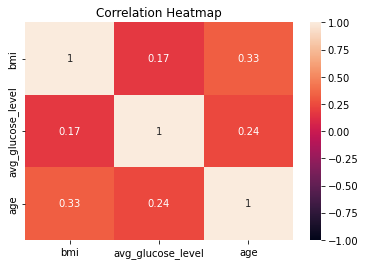

In [7]:
# checking correlation between numerical variables
heatmap = sns.heatmap(df_train[['bmi', 'avg_glucose_level', 'age']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap');

In [8]:
#checking for outliers bmi
Q1 = df_train['bmi'].quantile(0.25)
Q3 = df_train['bmi'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['bmi'] < (Q1 - 1.5 * IQR)) | (df_train['bmi'] > (Q3 + 1.5 * IQR))]
outliers[outliers['stroke']==1]
#There are outliers in bmi variable whwre stroke ==1 , 
#therefore we would not remove outliers since there are only 246 entries where stroke==1 in the dataset with 5103 entries.

,id,gender,age,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
16,13861,Female,52.0,Yes,Self-employed,Urban,1,0,233.29,48.9,never smoked,1
61,17004,Female,70.0,Yes,Private,Urban,0,0,221.58,47.5,never smoked,1
108,41069,Female,45.0,Yes,Private,Rural,0,0,224.10,56.6,never smoked,1


In [9]:
#checking for outliers age
Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['age'] < (Q1 - 1.5 * IQR)) | (df_train['age'] > (Q3 + 1.5 * IQR))]
outliers
#There are no outliers in age variable

,id,gender,age,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [10]:
#checking for outliers avg_glucose_level
Q1 = df_train['avg_glucose_level'].quantile(0.25)
Q3 = df_train['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df_train['avg_glucose_level'] > (Q3 + 1.5 * IQR))]
outliers[outliers['stroke']==1]
#There are outliers where stroke ==1 , 
#therefore we would not remove outliers since there are only 246 entries where stroke==1 in the dataset with 5103 entries.

,id,gender,age,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,Yes,Private,Urban,0,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,Yes,Self-employed,Rural,0,0,202.21,28.9,never smoked,1
8,8213,Male,78.0,Yes,Private,Urban,0,1,219.84,28.9,Unknown,1
9,5317,Female,79.0,Yes,Private,Urban,0,1,214.09,28.2,never smoked,1
11,56112,Male,64.0,Yes,Private,Urban,0,1,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
229,25974,Male,78.0,Yes,Self-employed,Urban,0,0,218.46,26.8,Unknown,1
230,1210,Female,68.0,Yes,Private,Rural,0,0,211.06,39.3,Unknown,1
236,52282,Male,57.0,Yes,Private,Rural,0,0,197.28,34.5,formerly smoked,1
237,45535,Male,68.0,Yes,Private,Rural,0,0,233.94,42.4,never smoked,1


In [11]:
# deleting variables that were not significant from training dataset
df_train.drop(columns = ['gender','Residence_type','smoking_status','bmi'], inplace = True)

# deleting variables that were not significant from testing dataset
df_test.drop(columns = ['gender','Residence_type','smoking_status','bmi'], inplace = True)


In [12]:
# creating normalized columns for numerical variables in training data
df_train['age_norm']=(df_train['age']-df_train['age'].min())/(df_train['age'].max()-df_train['age'].min())
df_train['avg_glucose_level_norm']=(df_train['avg_glucose_level']-df_train['avg_glucose_level'].min())/(df_train['avg_glucose_level'].max()-df_train['avg_glucose_level'].min())

# creating normalized columns for numerical variables in testing data
df_test['age_norm']=(df_test['age']-df_test['age'].min())/(df_test['age'].max()-df_test['age'].min())
df_test['avg_glucose_level_norm']=(df_test['avg_glucose_level']-df_test['avg_glucose_level'].min())/(df_test['avg_glucose_level'].max()-df_test['avg_glucose_level'].min())


In [13]:
# deleting original numerical values from training data
df_train.drop(columns = ['age','avg_glucose_level'], inplace = True)

# deleting original numerical values from testing data
df_test.drop(columns = ['age','avg_glucose_level'], inplace = True)


In [14]:
df_train

,id,ever_married,work_type,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm
0,9046,Yes,Private,0,1,1,0.816895,0.801265
1,51676,Yes,Self-employed,0,0,1,0.743652,0.679023
2,10434,No,Private,0,0,1,0.841309,0.181285
3,27419,Yes,Private,0,0,1,0.719238,0.097082
4,60491,Yes,Private,0,0,1,0.951172,0.015927
...,...,...,...,...,...,...,...,...
5098,44679,Yes,Govt_job,0,0,0,0.536133,0.139230
5099,69,Yes,Self-employed,1,0,1,0.523926,0.150863
5100,81,Yes,Private,0,0,1,0.523926,0.109362
5101,199,No,children,0,0,0,0.523926,0.184655


In [15]:
df_test

,id,hypertension,heart_disease,ever_married,work_type,stroke,age_norm,avg_glucose_level_norm
0,30468,1,0,Yes,Private,0,0.684932,0.133324
1,16523,0,0,No,Private,0,0.000000,0.294905
2,56543,0,0,Yes,Private,0,0.849315,0.000000
3,46136,0,0,No,Never_worked,0,0.082192,0.649989
4,32257,0,0,Yes,Private,0,0.534247,1.000000
5,31112,0,1,Yes,Private,1,0.986301,0.259883
6,60182,0,0,Yes,Private,1,0.561644,0.720104
7,1665,1,0,Yes,Self-employed,1,0.972603,0.740469
8,56669,0,0,Yes,Private,1,1.000000,0.825664
9,53882,1,1,Yes,Private,1,0.904110,0.007399


# Predictive modelling

### Cleaning data for predictions

In [16]:
#conda install -c conda-forge imbalanced-learn

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
object_cols = ["ever_married","work_type"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df_train[col])
    df_train[col] = label_encoder.transform(df_train[col])
    
for col in object_cols:
    label_encoder.fit(df_test[col])
    df_test[col] = label_encoder.transform(df_test[col])

In [18]:
df_train.head()

,id,ever_married,work_type,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm
0,9046,1,2,0,1,1,0.816895,0.801265
1,51676,1,3,0,0,1,0.743652,0.679023
2,10434,0,2,0,0,1,0.841309,0.181285
3,27419,1,2,0,0,1,0.719238,0.097082
4,60491,1,2,0,0,1,0.951172,0.015927


In [19]:
df_test.head()

,id,hypertension,heart_disease,ever_married,work_type,stroke,age_norm,avg_glucose_level_norm
0,30468,1,0,1,1,0,0.684932,0.133324
1,16523,0,0,0,1,0,0.000000,0.294905
2,56543,0,0,1,1,0,0.849315,0.000000
3,46136,0,0,0,0,0,0.082192,0.649989
4,32257,0,0,1,1,0,0.534247,1.000000


In [20]:

from imblearn.over_sampling import SMOTE


X = df_train.drop(columns =['id','stroke'])
y = df_train['stroke']

# Print class distribution before SMOTE
print("Class distribution before SMOTE:", y.value_counts())


Class distribution before SMOTE: 0    4857
1     246
Name: stroke, dtype: int64


In [21]:
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", y_smote.value_counts())

Class distribution after SMOTE: 1    4857
0    4857
Name: stroke, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
X_train = X_smote 
y_train = y_smote

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

X_test = df_test.drop( columns= ['id','stroke'])
y_test = df_test['stroke']
y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

[[2 3]
 [0 5]]


In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

[[4 1]
 [1 4]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

[[5 0]
 [2 3]]
